## Explore the correlation between Tsys, AC and WVR data

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def map_series_by_dict(a, d):

    v = np.array(list(d.values()))
    k = np.array(list(d.keys()))
    sidx = k.argsort()
    out_ar = v[sidx[np.searchsorted(k,a,sorter=sidx)]]
    return out_ar

def normalize_array(array, iants, obs_type, normScans=[0,0,0]):

    array_norm = np.full(np.shape(array), fill_value=np.nan)
    iants_uq = np.unique(iants)
    obsType_uq = np.unique(obs_type)
    for iant in iants_uq:
        for i, obs in enumerate(obsType_uq):
            conditions = ((iants == iant) & (obs_type==obs))
            indices = np.where(conditions)
            array_sub = array[indices]
            array_norm[indices] = array_sub / array_sub[normScans[i]]

    return array_norm

#### Load the pkl file

In [2]:
Dir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/'
picDir = Dir+'pictures/'

filename_pkl = 'Tsys_autCorr_correlation_spwautCorr26_spwTsys17_avgTime10.pkl'
with open(filename_pkl, 'rb') as pickle_file:
    Tsys_AC = pickle.load(pickle_file, encoding='latin')
print(Tsys_AC.keys())

filename_pkl2 = 'Tsys_WVR_matched_avgTime10.pkl'
with open(filename_pkl2, 'rb') as pickle_file:
    Tsys_WVR = pickle.load(pickle_file, encoding='latin')
print(Tsys_WVR.keys())

dict_keys(['info', 'iant', 'scan', 'obs_type', 'time_Tsys', 'dur_Tsys', 'Tsys', 'Tsys_norm', 'Tsky', 'Tsky_norm', 'Trx', 'Trx_norm', 'autCorr_means', 'autCorr_norms', 'tau_mean'])
dict_keys(['info', 'tau', 'scan', 'Tsys', 'vis', 'Tsky', 'iant', 'Trx', 'dur_Tsys', 'time_Tsys', 'obs_type', 'WVR_means'])


In [3]:
Tsys_norms = Tsys_AC['Tsys_norm']
AC_norms = Tsys_AC['autCorr_norms']
AC = Tsys_AC['autCorr_means']
Tsky = Tsys_AC['Tsky']
Tsys = Tsys_AC['Tsys']
Trx = Tsys_AC['Trx']
tau_mean = Tsys_AC['tau_mean']
iants = Tsys_AC['iant']
obs_types = Tsys_AC['obs_type']

Read and normalize the WVR data

In [4]:
vis = Tsys_WVR['info']['vis']
iants2 = Tsys_WVR['iant']
obs_types2 = Tsys_WVR['obs_type']
obs_types2 = obs_types2.astype('str')
WVR_sinchan = Tsys_WVR['WVR_means'][:,0]
WVR_norms = normalize_array(WVR_sinchan, iants2, obs_types2)

Tsys_norms2 = normalize_array(Tsys_WVR['Tsys'][:,0],iants2, obs_types2)

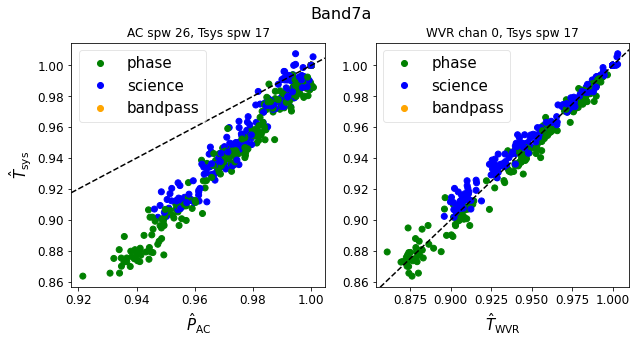

In [5]:
fig = plt.figure(figsize=(10,4.5))

ax0 = fig.add_subplot(121)
ax0.tick_params(labelsize=12)
# create color dictionary for the scatter plot
color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]
# plot the scatter plot
sc = ax0.scatter(AC_norms,Tsys_norms, c=map_series_by_dict(obs_types, color_dict))
# plot the 1-to-1 line
lower=max(ax0.set_xlim()[0], ax0.set_ylim()[0])
upper=min(ax0.set_xlim()[1], ax0.set_ylim()[1])
ax0.plot([lower, upper],[lower,upper],ls='--', color='black')
# title
title = 'AC spw 26, Tsys spw 17'
plt.title(title)
# label
plt.ylabel('$\hat{T}_{\mathrm{sys}}$', fontsize=15)
plt.xlabel('$\hat{P}_{\mathrm{AC}}$', fontsize=15)
plt.legend(handles=legendhandle,labels=list(color_dict.keys()), loc='upper left', framealpha=0.5, fontsize=15)

ax1 = fig.add_subplot(122)
ax1.tick_params(labelsize=12)
# create color dictionary for the scatter plot
color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]
# plot the scatter plot
sc = ax1.scatter(WVR_norms, Tsys_norms2, c=map_series_by_dict(obs_types2, color_dict))
# plot the 1-to-1 line
lower=max(ax1.set_xlim()[0], ax1.set_ylim()[0])
upper=min(ax1.set_xlim()[1], ax1.set_ylim()[1])
ax1.plot([lower, upper],[lower,upper],ls='--', color='black')
# title
title = 'WVR chan 0, Tsys spw 17'
plt.title(title)
# label
plt.xlabel('$\hat{T}_{\mathrm{WVR}}$', fontsize=15)
plt.legend(handles=legendhandle, labels=list(color_dict.keys()), loc='upper left', framealpha=0.5, fontsize=15)

fig.suptitle('Band7a', fontsize=16, y=0.99)
plt.savefig(picDir+'E2E8.1.00003.S/Tsys_WVR_AC_norms.pdf',bbox_inches='tight',pad_inches=0)

#### Manipulation to make AC vs Tsys correlation close to 1-to-1 relation

Normalize the new Tsys with the equation
\begin{equation}
T_{\mathrm{{sys, dsb}}} = 2T_{\mathrm{{sys}}} {\rm e}^{-\tau} - T_{\mathrm{sky}}
\end{equation}

In [6]:
Tsys_dsb = (2* Tsys * np.exp(-tau_mean) - Tsky)
Tsys_dsb_norms = normalize_array(Tsys_dsb, iants, obs_types)

Tsys_mod = Trx+Tsky*0.95+0.05*260
# Tsys_mod = 0.95*Tsys*np.exp(-tau_mean)
Tsys_mod_norms = normalize_array(Tsys_mod, iants, obs_types)

T_new = Trx
T_new_norms = normalize_array(T_new, iants, obs_types)

Compare with the old data

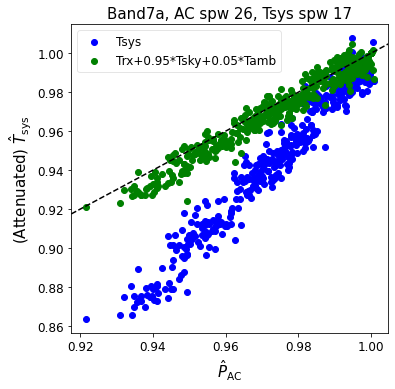

In [7]:
tex_textwidth=14.2
fig = plt.figure(figsize=(0.4*tex_textwidth,0.4*tex_textwidth))
ax = plt.subplot(111)
ax.tick_params(labelsize=12)
# plot the scatter plot
sc = ax.scatter(AC_norms, Tsys_norms, color='blue', label='Tsys')
sc1 = ax.scatter(AC_norms, Tsys_mod_norms, color='green', label='Trx+0.95*Tsky+0.05*Tamb')

# plot the 1-to-1 line
lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
ax.plot([lower, upper],[lower,upper],ls='--', color='black')

# title
title = 'Band7a, AC spw 26, Tsys spw 17'
plt.title(title, fontsize=15)

# label
ax.tick_params(labelsize=12)
plt.ylabel('(Attenuated) $\hat{T}_{\mathrm{sys}}$', fontsize=15)
plt.xlabel('$\hat{P}_{\mathrm{AC}}$', fontsize=15)
plt.legend(loc='upper left', framealpha=0.5, fontsize=12)
plt.savefig(picDir+'E2E8.1.00003.S/Tsys_AC_norms_corr_Band7a.pdf',bbox_inches='tight',pad_inches=0)

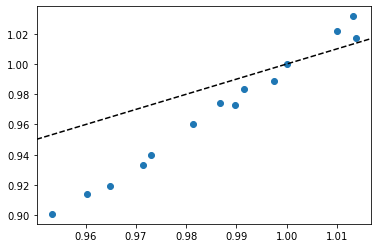

In [8]:
Tsys_iant = Tsys[np.where(iants==10)]
AC_iant = AC[np.where(iants==10)]

Tsys_norms_iant = Tsys_iant / Tsys_iant[0]
AC_norms_iant = AC_iant / AC_iant[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(AC_norms_iant, Tsys_norms_iant)

# plot the 1-to-1 line
lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
ax.plot([lower, upper],[lower,upper],ls='--', color='black')

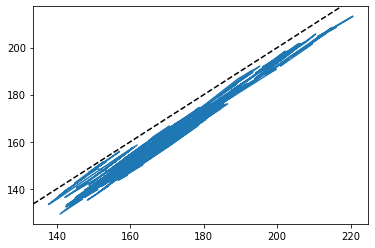

In [9]:
Tsky = Tsys_AC['Tsky']
Tsys = Tsys_AC['Tsys']
Trx = Tsys_AC['Trx']

Tsys_new = (Trx+0.95*Tsky+0.05*270)/np.exp(-tau_mean)/0.95

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Tsys_new, Tsys)

# plot the 1-to-1 line
lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
ax.plot([lower, upper],[lower,upper],ls='--', color='black')